In [1]:
import csv, os, re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer() 

mypath = "./Case Presentation 1"
files = os.listdir(mypath)

cur = {}
pas = {}
non = {}
unk = {}
for f in files:
    txtFile = open(mypath+'/'+f, 'r')
    tempTxt = txtFile.readlines()
    if f[:3] == 'CUR':
        for row in tempTxt:
            for string in (row.strip().split(' ' or ',' or ':')):
                string = string.lower()
                if string == '':
                    continue
                elif not string[0].isalpha() or string in stop_words:
                    continue;
                elif lemmatizer.lemmatize(string) in cur:
                    cur[lemmatizer.lemmatize(string)] += 1
                else:
                    cur[lemmatizer.lemmatize(string)] = 1

    elif f[:3] == 'PAS':
        for row in tempTxt:
            for string in (row.strip().split(' ' or ',' or ':')):
                string = string.lower()
                if string == '':
                    continue
                elif not string[0].isalpha() or string in stop_words:
                    continue;
                elif lemmatizer.lemmatize(string) in pas:
                    pas[lemmatizer.lemmatize(string)] += 1
                else:
                    pas[lemmatizer.lemmatize(string)] = 1

    elif f[:3] == 'NON':
        for row in tempTxt:
            for string in (row.strip().split(' ' or ',' or ':')):
                string = string.lower()
                if string == '':
                    continue
                elif not string[0].isalpha() or string in stop_words:
                    continue;
                elif lemmatizer.lemmatize(string) in non:
                    non[lemmatizer.lemmatize(string)] += 1
                else:
                    non[lemmatizer.lemmatize(string)] = 1
    else:
        for row in tempTxt:
            for string in (row.strip().split(' ' or ',' or ':')):
                string = string.lower()
                if string == '':
                    continue
                elif not string[0].isalpha() or string in stop_words:
                    continue;
                elif lemmatizer.lemmatize(string) in unk:
                    unk[lemmatizer.lemmatize(string)] += 1
                else:
                    unk[lemmatizer.lemmatize(string)] = 1




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wendy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wendy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
cur = sorted(cur.items(), key=lambda x: x[1], reverse=True)[:30]
pas = sorted(pas.items(), key=lambda x: x[1], reverse=True)[:30]
non = sorted(non.items(), key=lambda x: x[1], reverse=True)[:30]
unk = sorted(unk.items(), key=lambda x: x[1], reverse=True)[:30]


In [3]:
import pandas as pd

pd_cur = pd.DataFrame(cur , columns =['String', 'Times']) 
pd_pas = pd.DataFrame(pas , columns =['String', 'Times'])
pd_non = pd.DataFrame(non , columns =['String', 'Times']) 
pd_unk = pd.DataFrame(unk , columns =['String', 'Times']) 

## Current Smoker

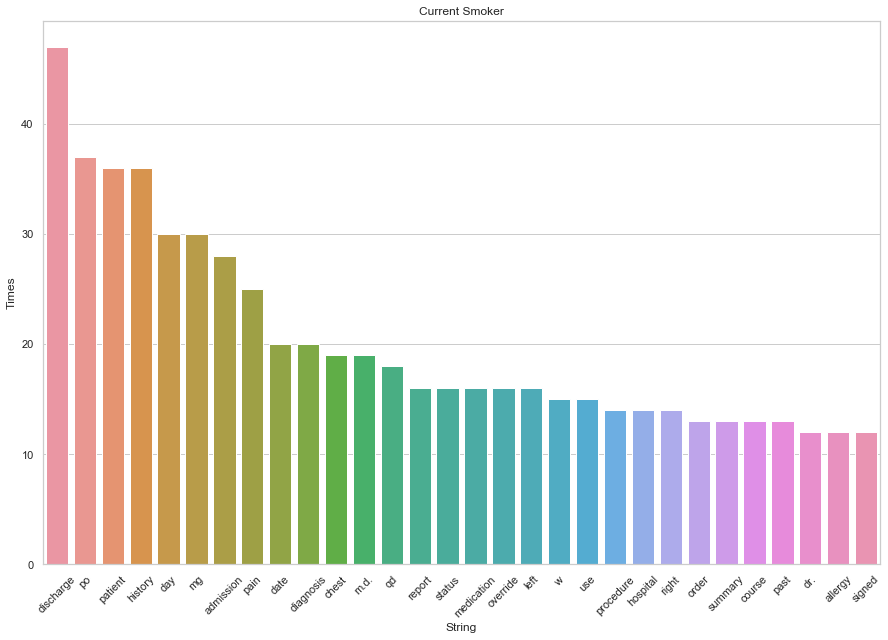

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='String', y='Times', data=pd_cur)
ax.set_title('Current Smoker')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

## Past Smoker

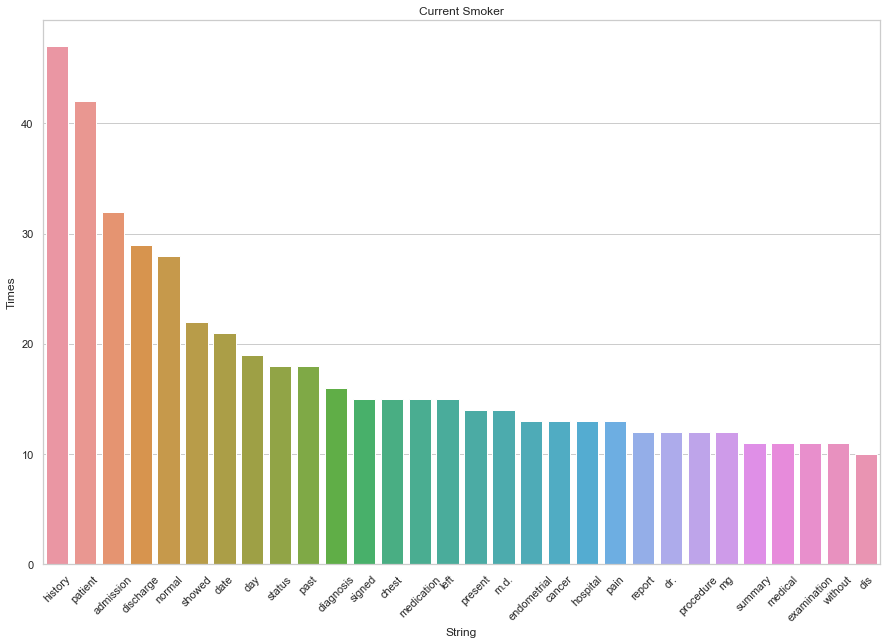

In [5]:
plt.figure(figsize=(15,10))
sns.set_theme(style="whitegrid")
bx = sns.barplot(x='String', y='Times', data=pd_pas)
bx.set_title('Current Smoker')
_ = bx.set_xticklabels(bx.get_xticklabels(), rotation=45)

## Non-Smoker

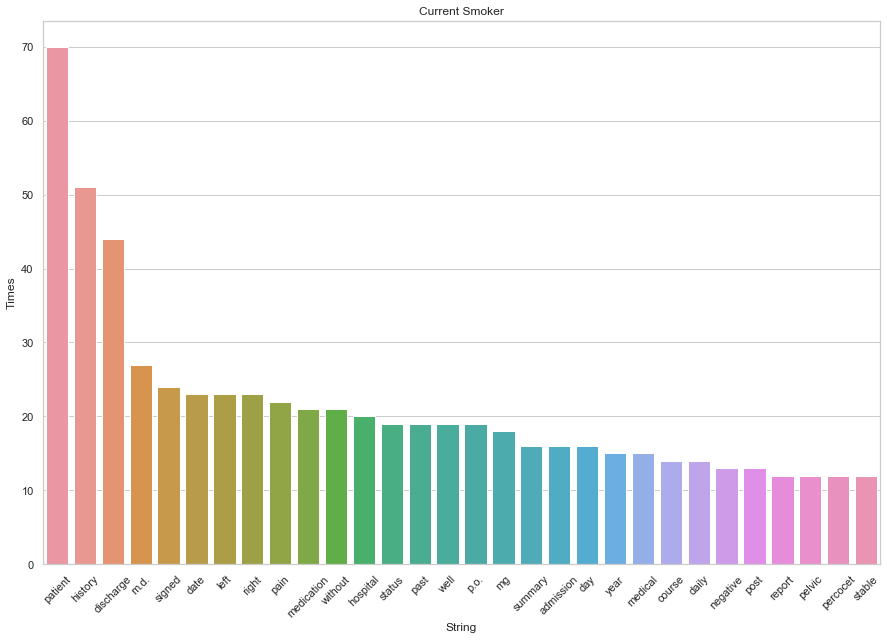

In [6]:
plt.figure(figsize=(15,10))
sns.set_theme(style="whitegrid")
cx = sns.barplot(x='String', y='Times', data=pd_non)
cx.set_title('Current Smoker')
_ = cx.set_xticklabels(cx.get_xticklabels(), rotation=45)

## Unknown

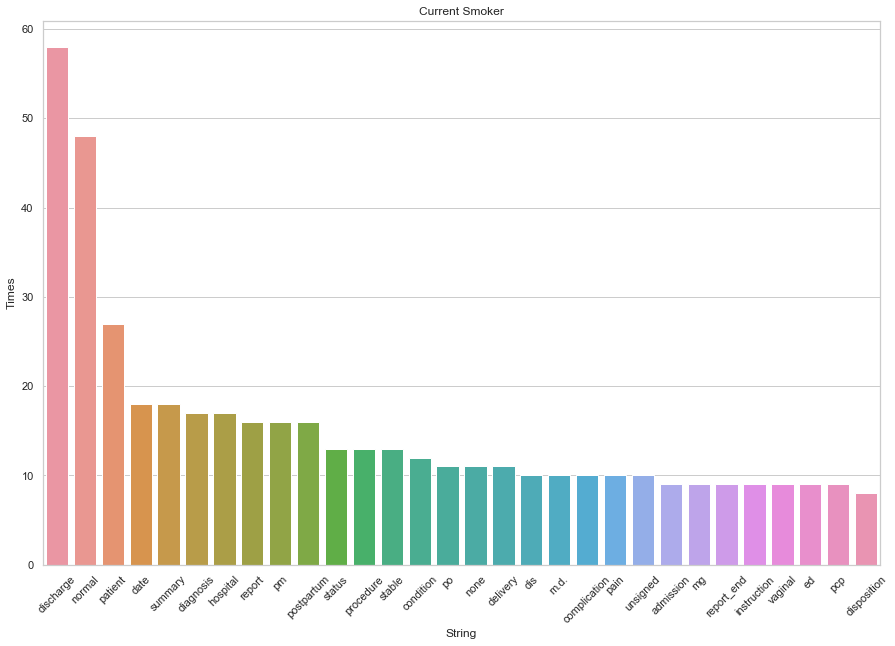

In [7]:
plt.figure(figsize=(15,10))
sns.set_theme(style="whitegrid")
dx = sns.barplot(x='String', y='Times', data=pd_unk)
dx.set_title('Current Smoker')
_ = dx.set_xticklabels(dx.get_xticklabels(), rotation=45)

#### htn
#### potentially
#### serious
#### lisinopril 1 Past 4 cur

#### endometrial 一個non  3個pas
#### cancer 2 non 4 pas
#### intact(完整), uterus(子宮) 一定不是cur
#### postoperative(術後), surgical , surgery一定不是unknown

#### preliminary初步判斷 一定是unknown

### Check for key words

In [17]:
import csv,os,re

mypath = "./Case Presentation 1"
files = os.listdir(mypath)


with open('output3.csv', 'w+', newline='') as csvfile:
    for f in files:
        txtFile = open(mypath+'/'+f, 'r')
        tempTxt = txtFile.readlines()
        if f[:3] == 'CUR' or f[:3] == 'PAS':
            tempRT = 'smoker'
        elif f[:3] == 'NON':
            tempRT = 'non_smoker'
        else:
            tempRT = 'unknown'
            
        for row in tempTxt:
            for string in (row.strip().split(' ' or ',' or ':')):
                string = string.lower()
                #string = lemmatizer.lemmatize(string, pos='v')
                if string in ['common']:
                    print(f)
